## Background


Cohorts analysis provide valuable insights into user behavior and performance over time.
- A cohort is a group of users who share a common characteristic or experience within a specified time frame, such as the month they joined a platform.  
- Analyzing cohorts helps understand user engagement, retention, and the impact of product changes.  
- By tracking cohorts, product analysts can identify trends, evaluate the effectiveness of marketing initiatives, and assess the long-term value of acquired customers.

This approach facilitates a more nuanced understanding of user dynamics, enabling companies to tailor strategies and optimize product experiences based on specific user segments.

Some characteristics of a cohort:
1. The timeline (acquisition date/some particular event etc) defines when should a user be mapped to a cohort.  
2. Various cohort durations can be considered and compared to understand user behaviour and draw insights.  
3. A user is considered as active if it's so specific intervals and hence considered as retained, otherwise churned out.
4. Each cohort duration represents a unique group of users.


In [ ]:
!pip install retentioneering

# 1. Loading data

In [1]:
# import required libraries
from retentioneering import datasets

In [2]:
# load sample user behavior data:
stream = datasets.load_simple_shop()

In [3]:
stream.to_dataframe().head()

,event_id,event_type,event_index,event,timestamp,user_id
0,1bd1acdd-ff6a-4a49-bf87-f672795f4e25,path_start,0,path_start,2019-11-01 17:59:13.273932,219483890
1,1bd1acdd-ff6a-4a49-bf87-f672795f4e25,raw,0,catalog,2019-11-01 17:59:13.273932,219483890
2,2d1732a6-297e-4b51-9971-729e95833545,raw,1,product1,2019-11-01 17:59:28.459271,219483890
3,d119317e-979a-4ed0-bda3-88b160160ffb,raw,2,cart,2019-11-01 17:59:29.502214,219483890
4,3777aadf-3420-47fa-aa90-86d9ce176198,raw,3,catalog,2019-11-01 17:59:32.557029,219483890


# 2. Visualizing Cohorts

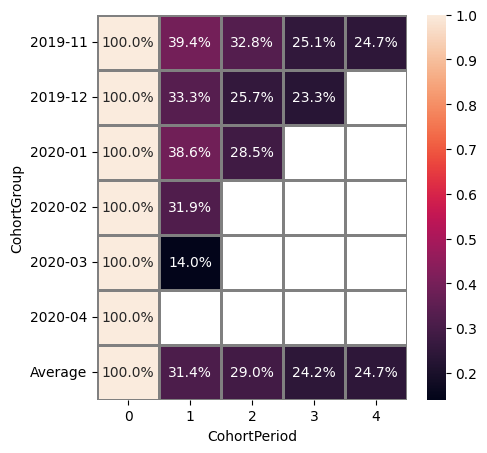

In [6]:
stream.cohorts(
    cohort_start_unit='M',
    cohort_period=(1, 'M'), # parameter defining time window
    average = True #True-average for each cohort period. Default value., False - averages are not calculated.
)

## Explanation of above visualization:
- For the users in cohort_period = 0 - cohort_period starts from the first click of the user in specified event. All users who perform action during this period fall into the first cohort (zero period).

# 3. Comparing Cohorts for active users

<Axes: xlabel='CohortPeriod', ylabel='CohortGroup'>

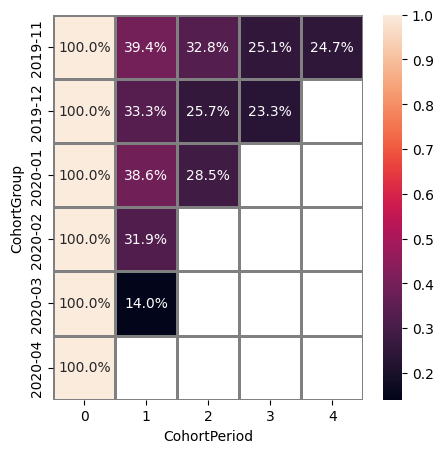

In [9]:
from retentioneering.tooling.cohorts import Cohorts

cohorts = Cohorts(eventstream=stream)
cohorts.fit(
    cohort_start_unit='M',
    cohort_period=(1, 'M'),
    average=False
    )
cohorts.heatmap()

<Axes: xlabel='Period from the start of observation', ylabel='Share of active users'>

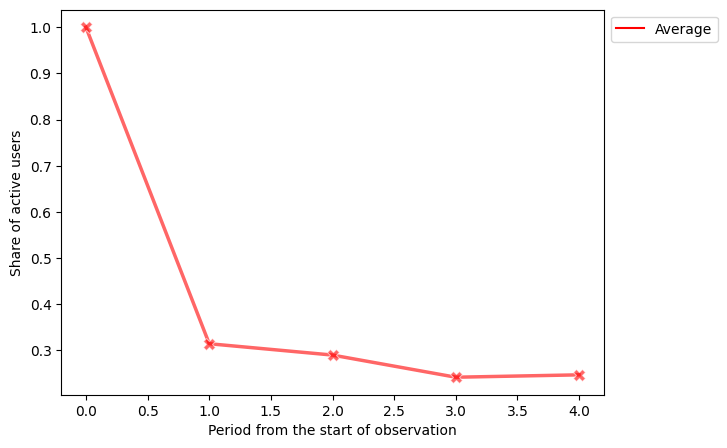

In [11]:
# Having a look at overall average value across all the cohorts
cohorts.lineplot(width=7, height=5, plot_type='average')

<Axes: xlabel='Period from the start of observation', ylabel='Share of active users'>

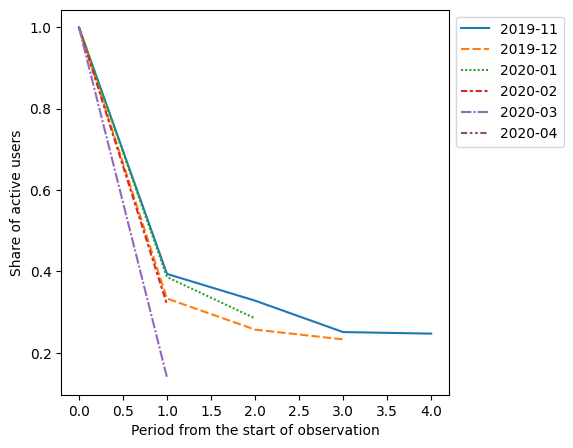

In [10]:
# Having a look at individual cohorts
cohorts.lineplot(width=5, height=5, plot_type='cohorts')

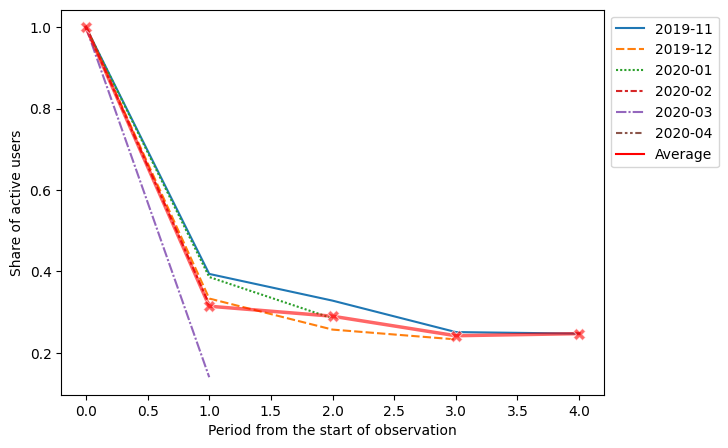

In [12]:
cohorts.lineplot(width=7, height=5, plot_type='all');

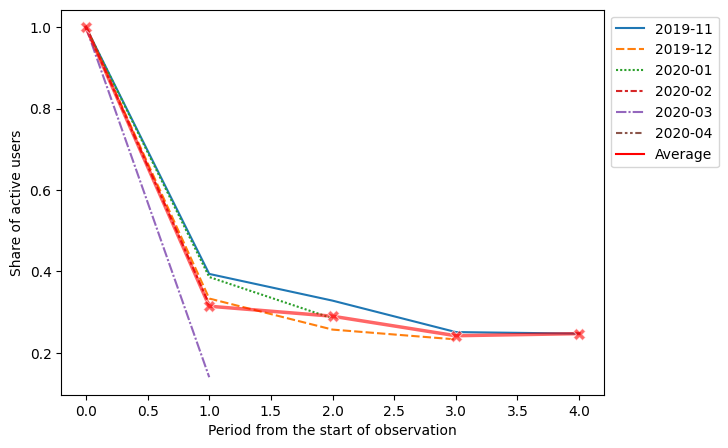

In [13]:
# To view individual cohorts, along with the average for all the cohorts
cohorts.lineplot(width=7, height=5, plot_type='all');